# Lecture 1: Basic Python
## ECON5170 Computational Methods in Economics
#### Author: Zhentao Shi
#### Date: March 2020

## Basic Python

### Introduction

There are numerous ways to learn the programming language Python. One can find books
*  https://opensource.com/article/18/9/python-programming-book-list

Or web-based learning tutorials:
*  https://www.kaggle.com/learn/python

Or via Youtube:
*  https://www.youtube.com/results?search_query=python+tutorial

This lecture quickly sketches some key points of the manual, while you should carefully go over Python-Introduction
after today's lecture.

### Help System

The help system for Python is a build-in function named ``` help([object]) ``` with which you can check its usage. Another way to find help is to check each package-documentation you installed.

### Vector 
A *vector* is a collection of elements of the same type, say, integer, logical value, real number, complex number, characters or factor.
Python does not require explicit type declaration. Although, if you want to save a strings, you need ```" "``` around your vector 

-  assigns the value on its right-hand side to a self-defined variable name on its left-hand side.
-  '[ ] creates a list of vectors
-  Binary arithmetic operations `+`, `-`, `*` and `\` are performed element by element.
-  Further arithmetic operators: exponends are expressed with `**`, and `%` is the reminder.
-  So are the binary logical operations `&`, `|`, `!=`, `=`, `<`, `>`, `>=`, `<=`.
-  *Factor* is a categorical number. *Character* is text.

##### Example


### Array and Matrix

To create arrays and matrices, we need to install the package "numpy" as the following:

In [1]:
#Import the NumPy library
import numpy as np
# Import the Pandas library
import pandas as pd

An array is a table of numbers.  
A matrix is a 2-dimensional array.

##### Example

In [2]:
# Create an array
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [3]:
# Create a matrix
M = np.matrix([[1,2],[3,4]])
M

matrix([[1, 2],
        [3, 4]])

In [4]:
#Shape of matrix
A.shape

(2, 3)

For further readings, please find a list of basic commands in the documentation of NumPy: 
https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html

### OLS-Example
OLS estimation with one $x$ regressor and a constant.
Graduate textbook expresses the OLS in matrix form
$\hat{\beta} = (X' X)^{-1} X'y.$
To conduct OLS estimation in Python, we literally translate the mathematical expression into code.

__Step 1__: We need data $Y$ and $X$ to run OLS. We simulate an artificial dataset.

In [5]:
# simulate data
import random
np.random.seed(111) # can be removed to allow the result to change
# set the parameters
n = 100
b0 = np.matrix([ [1],[2] ] )
# generate the data
e = np.random.normal(size = (n,1))
X = np.hstack((np.ones((n, 1)), np.random.normal(size = (n, 1))))
y = np.dot(X, b0) + e

__Step 2:__ translate the formula to code

In [6]:
# OLS estimator
bhat = np.dot(np.linalg.inv(np.dot( X.T, X ) ), np.dot( X.T, y ) ) 
print(bhat)

[[0.99086531]
 [1.92203641]]


__Step 3 (additional):__ plot the regression graph with the scatter points and the regression line.
Further compare the regression line (black) with the true coefficient line (red).

In [7]:
# Import MathPlotLib
import matplotlib.pyplot as plt
X1 = X[:, 1]
plt.plot(X1, y, 'o')
plt.plot(X1, np.dot(X, b0), color='red', linestyle='-')
plt.plot(X1, np.dot(X, bhat), color='black', linestyle='-')
plt.title('regression')
plt.xlabel('x1')
plt.ylabel('y')
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.axvline(0, color = 'black', linestyle = 'dashed')
plt.show()

<Figure size 640x480 with 1 Axes>

__Step 4:__ In econometrics we are often interested in hypothesis testing.

The *t*-statistic is widely used.
To test the null $H_0: \beta_2 = 1$, we compute the associated *t*-statistic.
Again, this is a translation.
$$
t  =  \frac{\hat{\beta}_2 - \beta_{02}}{ \hat{\sigma}_{\hat{\beta}_2}  }
   =  \frac{\hat{\beta}_2 - \beta_{02}}{ \sqrt{ \left[ (X'X)^{-1} \hat{\sigma}^2 \right]_{22} } }.
$$
where $[\cdot]_{22}$ is the (2,2)-element of a matrix.

In [8]:
# Import Math

# Calculate the t-value
bhat2 = bhat.item(1) # item( ) is a new function I learn today

e_hat = y - np.dot(X, bhat)
sigma_hat_square = np.dot(e_hat.T, e_hat).item(0) / (n-2)

Sigma_B = np.linalg.inv(np.dot(X.T, X)) * sigma_hat_square
t_value_2 = (bhat2 - b0[1, 0]) / np.sqrt(Sigma_B[1, 1])
print(t_value_2)

-0.7771772903170152


### Package/Module/Library

Similar to the packages in R, Python has numerous useful packages/modules/libraries. You have first install the targeted package into the environment (different IDEs have different installing procedures). Then to invoke a module in a certain scripts, use the function import(module_name) as abbr; every time the function of the module is called, use abbr.func_name().

### Input and Output

To read and write csv files in Python, use the pandas library.

#### Example:

% artificial code

import pandas as pd

sample_data = pd.read_csv('source.csv')

sample_data = sample_data.dropna()

pd.to_csv(sample_data, file = 'out.csv')

### Statistics

To implement most of the statistical tasks, use the package SciPy. Commonly used probability distributions can be found in the subpackage SciPy.stats. If you hope to draw the kernel density plot for a given set of data, use the seaborn package.

##### Example:

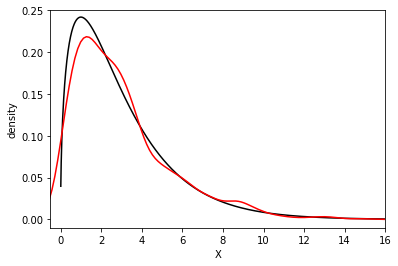

In [9]:
# Import Packages
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0.01, 16, num = 1600)
y = stats.chi2.pdf(x, 3)
z = stats.chi2.rvs(3, size = 1000)

plt.plot(x, y, linestyle = '-', color = 'black')
sns.distplot(z, hist = False, color = 'red')
plt.xlim(-0.5, 16)
plt.ylim(-0.01, 0.25)
plt.xlabel('X')
plt.ylabel('density')
plt.show()

In [10]:
crit = stats.chi2.ppf(q = 0.95, df = 3)
print(len([i for i in z if i > crit]) / len(z))

0.053


### User-defined function

The format of a user-defined function in Python is

`def function_name(input):
    expressions 
    return output`

The beginning of the main function is written as follows:

`if _name_ == '_main_':
    expressions
    function_name`


##### Example:

If the central limit theorem is applicable, then
we can calculate the 95% two-sided asymptotic confidence interval as
$$\left(\hat{\mu} - \frac{1.96}{\sqrt{n}} \hat{\sigma}, \hat{\mu} + \frac{1.96}{\sqrt{n}} \hat{\sigma} \right)$$
from a given sample.
It is an easy job.

In [11]:
#construct confidence interval


def CI(x):
    #x is a vector of random variables
    n = len(x)
    mu = np.mean(x)
    sig = np.std(x)
    upper = mu + 1.96 / np.sqrt(n) * sig
    lower = mu - 1.96 / np.sqrt(n) * sig
    return {'lower': lower, 'upper': upper}

### Flow Control
Flow control is common in all programming languages.
`if` is used for choice, and `for` or `while` is used for loops.

##### Example

Calculate the empirical coverage probability of a Poisson distribution of degrees of freedom 2.
We conduct this experiment for 1000 times.


In [12]:
import datetime
from scipy import stats

Rep = 1000
sample_size = 100
capture = [0] * Rep

#check time
pts0 = datetime.datetime.now()

for i in range(Rep):
    mu = 2
    x = stats.poisson.rvs(mu, size = sample_size)
    bounds = CI(x)
    if (bounds['lower'] <= mu and mu <= bounds['upper']):
        capture[i] = 1
    

print(np.mean(capture))
pts1 = datetime.datetime.now() - pts0
print("Time difference of: ", pts1)

0.949
Time difference of:  0:00:00.226357


### Statistical Model

Statistical models are formulated as `y~x`, where `y` on the left-hand side is the dependent variable,
and `x` on the right-hand side is the explanatory variable.
The OLS function of the package ```scikit-learn``` is `LinearRegression()`. It is called by `LinearRegression()`.

In [13]:
import numpy as np
from scipy import stats
import statsmodels.api as sm

T = 30
p = 2
b0 = np.full([p,1], 1 )

#generate data
x = stats.norm.rvs(size = [T,p])
y = np.dot(x, b0) + stats.norm.rvs(size = [T,1])


#Linear model
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.767
Method:                 Least Squares   F-statistic:                              50.26
Date:                Sat, 07 Mar 2020   Prob (F-statistic):                    5.42e-10
Time:                        00:27:08   Log-Likelihood:                         -38.515
No. Observations:                  30   AIC:                                      81.03
Df Residuals:                      28   BIC:                                      83.83
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

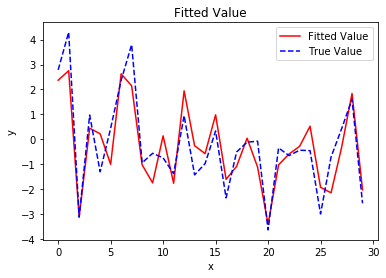

In [14]:
plt.plot(results.fittedvalues, color = 'red', label = 'Fitted Value')
plt.plot(y, color = 'blue', linestyle = 'dashed', label = 'True Value')
plt.title('Fitted Value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The `result` object is a list containing the regression results. As shown in the results, we can easily read the estimated coefficients, t-test results, F-test results, and the R-sqaure.

We can plot the true value of $y$ and fitted value to examine whether the first regressor fits the data.

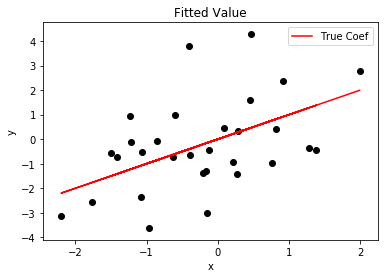

In [15]:
x0 = x[:,0]
plt.plot(x0, x0*b0.item(0), color = 'red', label = 'True Coef')
plt.scatter(x0, y, color = 'black', marker = 'o')
plt.title('Fitted Value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()